<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/study/sklearn/pima_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[pima-diabetes kaggle dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

## **About Dataset**

- 데이터 셋에 포함된 특정 진단 측정을 기반으로 환자가 당뇨병이 있는지 여부를 진단적으로 예측하는 것
- Pregnancies : 임신 횟수
- Glucose : 포도당
- BloodPressure : 혈압
- Skin Thickness : 팔 삼두근 뒤쪽의 피하지방 측정값
- Insulin : 인슐린 수치
- BMI : 체질량지수
- DiabetesPedigreeFunction : 당뇨 내력 가중치 값
- Age : 나이

In [1]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}\n'.format(accuracy, precision, recall, f1, roc_auc))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 156, stratify=y) # 클래스의 분포 비율까지 맞춰주기

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
 [[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1: 0.6392, AUC: 0.7919



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

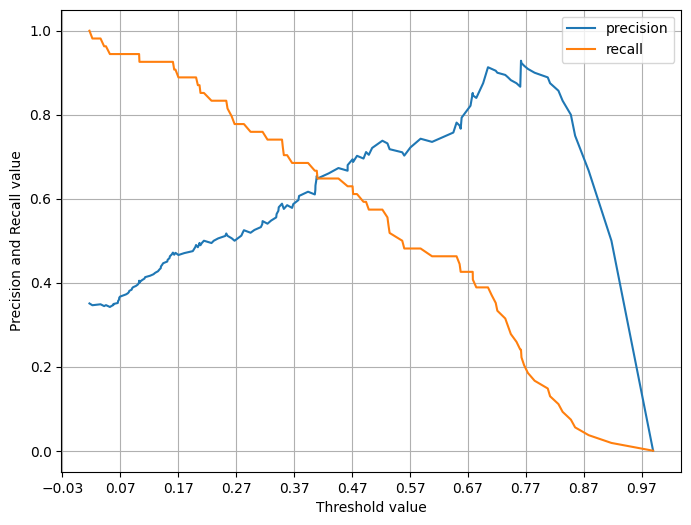

In [7]:
pred_proba_c1 = lr.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

- 0.42 정도의 임계값에서 정밀도와 재현율이 균형을 이룬다. 하지만 두 지표 모두 0.7로 낮은 수치이다.
    - 해결방안모색 : 원본 데이터 값 점검
    > df.describe()의 분포를 확인해보고 min, max 처럼 극단적인 수치에 집중한다.</br> 이 값이 현실적으로 가능한 값인지, 모델 학습에 도움이 되는 방향인지 확인하고 삭제하거나 평균값으로 대체한다.
    

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

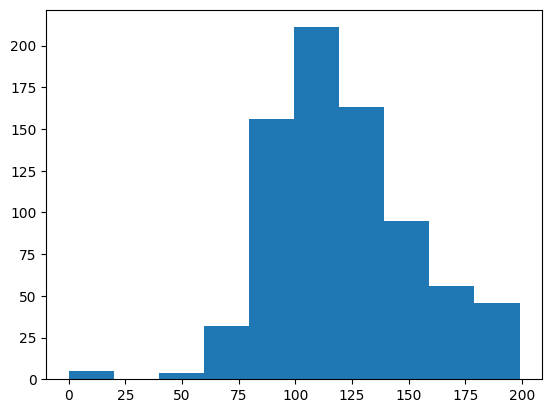

In [9]:
plt.hist(df['Glucose'], bins=10)

In [10]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = df['Glucose'].count()

for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [11]:
mean_zero_features = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0, mean_zero_features)

In [12]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_proba_c1 = clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba_c1)

오차 행렬
 [[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433



In [17]:
from sklearn.preprocessing import Binarizer

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print(accuracy, precision, recall)

def get_eval_by_threshold(y_test, pred_proba_positive, thresholds):

    '''
    사용 예시)
    thresholds = [0.1, 0.5, 0.6] # threshold 값들은 (0, 1) 범위 내
    get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)
    '''

    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_positive)
        custom_predict = binarizer.transform(pred_proba_positive)
        print('임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값 :  0.3
오차 행렬
[[67 33]
 [11 43]]
0.7142857142857143 0.5657894736842105 0.7962962962962963
임계값 :  0.33
오차 행렬
[[72 28]
 [12 42]]
0.7402597402597403 0.6 0.7777777777777778
임계값 :  0.36
오차 행렬
[[76 24]
 [15 39]]
0.7467532467532467 0.6190476190476191 0.7222222222222222
임계값 :  0.39
오차 행렬
[[78 22]
 [16 38]]
0.7532467532467533 0.6333333333333333 0.7037037037037037
임계값 :  0.42
오차 행렬
[[84 16]
 [18 36]]
0.7792207792207793 0.6923076923076923 0.6666666666666666
임계값 :  0.45
오차 행렬
[[85 15]
 [18 36]]
0.7857142857142857 0.7058823529411765 0.6666666666666666
임계값 :  0.48
오차 행렬
[[88 12]
 [19 35]]
0.7987012987012987 0.7446808510638298 0.6481481481481481
임계값 :  0.5
오차 행렬
[[90 10]
 [21 33]]
0.7987012987012987 0.7674418604651163 0.6111111111111112


위의 결과를 분석하면 다음과 같다
- 정확도와 정밀도를 희생하고 재현율을 높이는데 가장 좋은 임곗값은 0.3</br>
하지만 정밀도가 너무 낮아졌으니 극단적 선택
- 0.48리 적당해보임

In [19]:
binarizer = Binarizer(threshold=0.48)

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}\n'.format(accuracy, precision, recall, f1, roc_auc))

pred_by_threshold_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))
get_clf_eval(y_test, pred_by_threshold_048, pred_proba[:, 1])

오차 행렬
 [[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433

